In [171]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [172]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [173]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import random

In [174]:
# Parse the interactome file
def parse_interactome(file_path):
    interactome_data = []
    with open(file_path, 'r') as file:
        # Skip the header line
        next(file)
        for line in file:
            line_data = line.strip().split('\t')
            tail, head, edge_weight, edge_type = line_data
            # Convert edge weight to float
            edge_weight = float(edge_weight)
            interactome_data.append((tail, head, edge_weight, edge_type))
    return interactome_data

In [175]:
# Graph Construction
def construct_graph(interactome_data):
    G = nx.DiGraph()
    for tail, head, edge_weight, _ in interactome_data:
        G.add_edge(tail, head, weight=edge_weight)
    return G

In [176]:
# Basic Analysis
def analyze_graph(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    print("Number of nodes:", num_nodes)
    print("Number of edges:", num_edges)
    print("Average degree:", avg_degree)

In [177]:
def get_unique_nodes(G):
    return list(G.nodes())

In [178]:
def get_most_connected_nodes(G, n):
    return sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:n]

In [179]:
def visualize_graph(G, limit=100):
    # Get a subgraph of the first 100 nodes
    subgraph_nodes = get_unique_nodes(G)[:limit]
    subgraph = G.subgraph(subgraph_nodes)
    
    # Draw the subgraph with improved aesthetics
    pos = nx.spring_layout(subgraph, k=0.15)  # Adjust layout algorithm and parameters
    nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', width=0.5, font_size=5)
    
    # Customize plot aesthetics
    plt.title("Visualization of Subgraph")
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [180]:
def visualize_graph_edge(G, node_limit=100, edge_threshold=100):
    # Get a subgraph with a limited number of nodes
    subgraph_nodes = [node for node, degree in G.degree() if degree > 0][:node_limit]
    subgraph = G.subgraph(subgraph_nodes)
    
    # Get edges with confidence above the threshold
    edges_above_threshold = [(u, v) for u, v, d in subgraph.edges(data=True) if d['weight'] > edge_threshold]
    
    # Draw the subgraph with improved aesthetics
    pos = nx.spring_layout(subgraph, k=0.15)  # Adjust layout algorithm and parameters
    nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', width=0.5, font_size=5)
    
    # Draw edges above the threshold
    nx.draw_networkx_edges(subgraph, pos, edgelist=edges_above_threshold, edge_color='red', width=1.5)

    # Customize plot aesthetics
    plt.title("Visualization of Subgraph with Edge Threshold")
    plt.axis('off')  # Turn off axis
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [181]:
# Implement a function to find acyclic shortest paths between two proteins
def find_acyclic_shortest_paths(graph, source, target):
    acyclic_shortest_paths = []
    for path in nx.all_shortest_paths(graph, source=source, target=target):
        if len(path) == len(set(path)):
            acyclic_shortest_paths.append(path)
    return acyclic_shortest_paths

In [182]:
#Generate a text file listing the acyclic shortest paths between two proteins
def write_shortest_paths_to_file(paths, file_path, graph):
    with open(file_path, 'w') as file:
        for i, path in enumerate(paths, start=1):
            total_score = sum(graph[path[j]][path[j+1]]['weight'] for j in range(len(path)-1))
            file.write(f"Path {i}: {' -> '.join(path)}\n")
            file.write(f"Total Path Score: {total_score}\n")
            for j in range(len(path)-1):
                weight = graph[path[j]][path[j+1]]['weight']
                file.write(f"Interaction Weight ({path[j]} -> {path[j+1]}): {weight}\n")
            file.write('\n')


In [183]:
def visualize_shortest_paths_only(shortest_paths, source, target):
    plt.figure(figsize=(10, 8))
    pos = None  # No need to compute layout for only paths
    
    # Create an empty graph
    shortest_path_graph = nx.DiGraph()
    
    # Add nodes and edges from the shortest paths to the graph
    for path in shortest_paths:
        for i in range(len(path) - 1):
            shortest_path_graph.add_edge(path[i], path[i+1])
    
    # Define node colors
    node_colors = ['lightgreen' if node == source else 'lightcoral' if node == target else 'lightblue' for node in shortest_path_graph.nodes()]
    
    # Draw the shortest paths with custom node colors
    nx.draw_networkx(shortest_path_graph, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10, font_weight='bold', edge_color='red', width=2, alpha=0.5)
    
    plt.title("Shortest Paths between Source(green) and Target(lightcoral) Proteins")
    plt.axis('off')
    plt.show()


Number of nodes: 17168
Number of edges: 612516
Average degree: 71.35554520037279


C:\Users\dodom\AppData\Local\Temp\ipykernel_22864\2077039014.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to prevent overlap


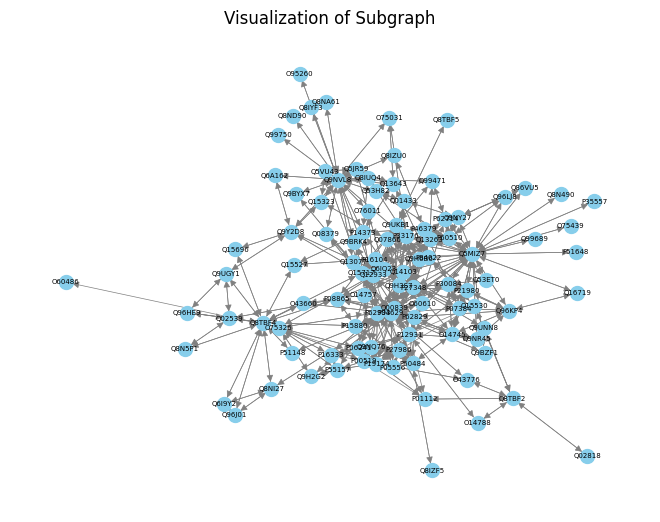

C:\Users\dodom\AppData\Local\Temp\ipykernel_22864\1709660364.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout to prevent overlap


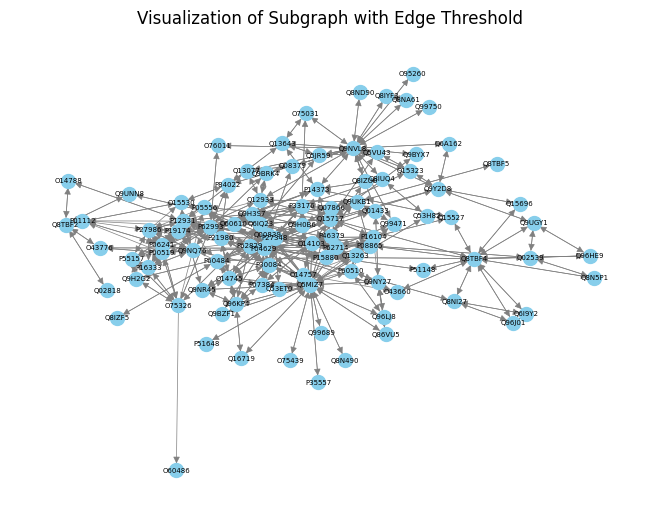

In [184]:
# Main code
file_path = "C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/PathLinker_2018_human-ppi-weighted-cap0_75.txt"
interactome_data = parse_interactome(file_path)
graph = construct_graph(interactome_data)
analyze_graph(graph)
visualize_graph(graph, limit=100)
visualize_graph_edge(graph, node_limit=100, edge_threshold=100)

Number of acyclic shortest paths: 6


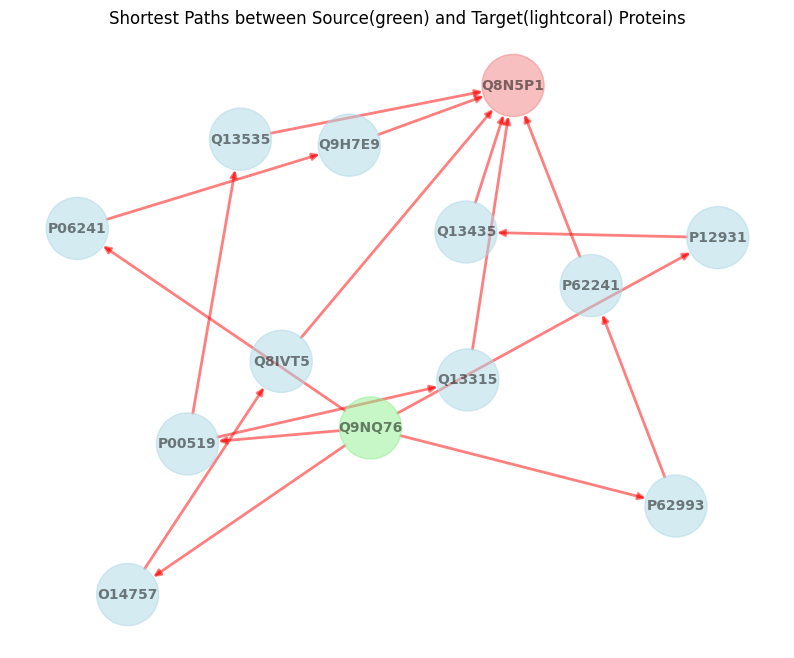

In [185]:

source = "Q9NQ76"
target = "Q8N5P1"
acyclic_shortest_paths = find_acyclic_shortest_paths(graph, source, target)
print("Number of acyclic shortest paths:", len(acyclic_shortest_paths))
write_shortest_paths_to_file(acyclic_shortest_paths, "acyclic_shortest_paths.txt", graph)
visualize_shortest_paths_only(acyclic_shortest_paths, source, target)

In [186]:
import networkx as nx
import numpy as np

In [187]:
def load_graph(file_path):
    G = nx.DiGraph()
    with open(file_path, 'r') as f:
        current_path = None
        for line in f:
            line = line.strip()
            if line.startswith("Path"):
                # Start of a new path
                current_path = line.split(": ")[1]
            elif line.startswith("Total Path Score"):
                # Extract total path score (not used here)
                pass
            elif line.startswith("Interaction Weight"):
                # Extract interaction weight and add edge to graph
                interaction = line.split(": ")[1]
                source_dest_weight = interaction.split(" -&gt; ")
                source = source_dest_weight[0].split(" ")[0]  # Extract source protein
                dest_weight = source_dest_weight[1].split("): ")  # Split destination and weight
                dest = dest_weight[0].strip()  # Extract destination protein
                weight = dest_weight[1]  # Extract weight
                G.add_edge(source, dest, weight=float(weight), method="unknown")  # Assuming method is unknown
    return G


In [188]:
# Load the weighted graph (output from Team Member 1)
file_path = "C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/Graph-Construction-shortest-path/acyclic_shortest_paths.txt"  # Replace with the actual file path
# G = load_graph(file_path)

In [192]:
def extract_values_from_file(file_path):
    # Initialize a list to store all detected outputs
    all_detected_outputs = []

    # Open the file for reading
    with open(file_path, 'r') as file:
        # Loop through each line in the file
        for line in file:
            # Check if the line contains the pattern "(interaction weight)"
            if "Score" not in line:
                if "Path" in line:
                    if ":" in line:
                        # Find the position of "Path" in the line
                        index = line.find(":")

                        # Extract the substring starting from the position of "Path" to the end of the line
                        extracted_string = line[index+len(": "):].strip()

                        # Split the extracted string by "->" to get individual values
                        values = extracted_string.split("->")

                        # Initialize a list to store extracted values
                        extracted_values = []

                        # Loop through each value
                        for value in values:
                            # Extract and append the trimmed value to the extracted values list
                            extracted_values.append(value.strip())

                        # Append the extracted values list to the list of all detected outputs
                        all_detected_outputs.append(extracted_values)

    # Return all the detected outputs
    return all_detected_outputs




In [193]:
# Example usage:
file_path = "C:/Users/dodom/Documents/university/Bioinformatics/Protein-Protein-Interaction-Analysis-with-NetworkX/Graph-Construction-shortest-path/acyclic_shortest_paths.txt"
detected_outputs = extract_values_from_file(file_path)
print("Detected outputs:")
print(detected_outputs)
for output in detected_outputs:
    print(output)


Detected outputs:
[['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1'], ['Q9NQ76', 'P62993', 'P62241', 'Q8N5P1'], ['Q9NQ76', 'P00519', 'Q13535', 'Q8N5P1'], ['Q9NQ76', 'P00519', 'Q13315', 'Q8N5P1'], ['Q9NQ76', 'P12931', 'Q13435', 'Q8N5P1'], ['Q9NQ76', 'P06241', 'Q9H7E9', 'Q8N5P1']]
['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1']
['Q9NQ76', 'P62993', 'P62241', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13535', 'Q8N5P1']
['Q9NQ76', 'P00519', 'Q13315', 'Q8N5P1']
['Q9NQ76', 'P12931', 'Q13435', 'Q8N5P1']
['Q9NQ76', 'P06241', 'Q9H7E9', 'Q8N5P1']


[('Q9NQ76', 'O14757'), ('Q9NQ76', 'P62993'), ('Q9NQ76', 'P00519'), ('Q9NQ76', 'P12931'), ('Q9NQ76', 'P06241'), ('O14757', 'Q8IVT5'), ('Q8IVT5', 'Q8N5P1'), ('P62993', 'P62241'), ('P62241', 'Q8N5P1'), ('P00519', 'Q13535'), ('P00519', 'Q13315'), ('Q13535', 'Q8N5P1'), ('Q13315', 'Q8N5P1'), ('P12931', 'Q13435'), ('Q13435', 'Q8N5P1'), ('P06241', 'Q9H7E9'), ('Q9H7E9', 'Q8N5P1')]


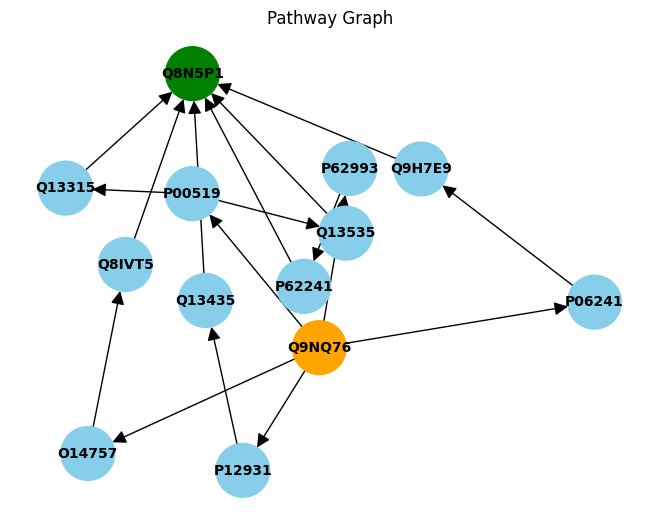

In [194]:


def create_graph_from_pathways(pathways):
    # Create a directed graph
    
    G = nx.DiGraph()

    # Add nodes and edges from pathways
    for pathway in pathways:
        for i in range(len(pathway) - 1):
            source_node = pathway[i]
            target_node = pathway[i + 1]
            G.add_edge(source_node, target_node)

    return G


def plot_graph(G):
    # Plot the graph
        # Retrieve the first node by finding nodes with no predecessors
    first_node = [node for node in G.nodes if not list(G.predecessors(node))][0]

    # Retrieve the last node by finding nodes with no successors
    last_node = [node for node in G.nodes if not list(G.successors(node))][0]

    
    node_colors = ["orange" if node in first_node  else "green" if node in last_node else "skyblue" for node in G.nodes]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color=node_colors, font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Pathway Graph")
    plt.show()

# Example usage:

graph = create_graph_from_pathways(detected_outputs)
print(graph.edges())
plot_graph(graph)


In [195]:
def transform_and_remove_repeated(pathways):
    # Flatten the 2D array to 1D array
    flattened_pathways = [protein for pathway in pathways for protein in pathway]

    # Check for repetition and remove repeated elements
    unique_elements = []
    repeated_elements = set()
    for protein in flattened_pathways:
        if protein not in unique_elements:
            unique_elements.append(protein)

    return unique_elements

unique_elements = transform_and_remove_repeated(detected_outputs)
print("Unique elements after removing repetitions:", unique_elements)



Unique elements after removing repetitions: ['Q9NQ76', 'O14757', 'Q8IVT5', 'Q8N5P1', 'P62993', 'P62241', 'P00519', 'Q13535', 'Q13315', 'P12931', 'Q13435', 'P06241', 'Q9H7E9']


In [196]:

import os


import numpy as np

def adjacency_matrix_2d(pathways, path_1_D):
    # Create the adjacency matrix
    adjacency_matrix = np.zeros((len(path_1_D), len(path_1_D)))
    for i in range(len(path_1_D)):
        for j in range(len(path_1_D)):
            for path in pathways:
                for k in range(len(path) - 1):
                    if path_1_D[i] == path[k] and path_1_D[j] == path[k + 1]:  
                        adjacency_matrix[i][j] = 1
    adjacency_matrix = adjacency_matrix.astype(int)
    
    # Calculate the maximum width for the alignment
    max_width = max(len(s) for s in path_1_D) + 2  # Adding extra space for better readability

    # Create the header row
    header = " " * max_width + " ".join([f"{item:>{max_width}}" for item in path_1_D])
    
    # Create the matrix rows with enhanced spacing and style
    rows = []
    for i, row in enumerate(adjacency_matrix):
        row_str = " ".join([f"{val:>{max_width}}" for val in row])
        rows.append(f"{path_1_D[i]:>{max_width}} {row_str}")

    # Save the formatted adjacency matrix to a file
    with open("adjacency_matrix.txt", "w") as matrix_file:
        matrix_file.write(header + "\n")
        for row in rows:
            matrix_file.write(row + "\n")



adjacency_matrix_2d(detected_outputs, unique_elements)


